<a href="https://colab.research.google.com/github/Jyoti-S-Shukla/Deep-learning-models/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Autoencoders

<!-- Name : Jyoti S. Shukla

Roll Number : 211022003 -->

Reference : 
 1. https://towardsdatascience.com/how-to-make-an-autoencoder-2f2d99cd5103
 2. https://www.geeksforgeeks.org/contractive-autoencoder-cae/
 3. https://blog.keras.io/building-autoencoders-in-keras.html

#Problem 1 :  Demonstrate the working principle of Autoencoder. (pytorch/keras/tensorflow)
Observation to be demonstrated
1. Use suitable data to demonstrate the same. (MNIST fashion/digit data can be
used)
2. Train the auto encoder with clean image and test using noisy image (you can add
some random Gaussian noise). Demonstrate the effect with/without dropout.
3. CNN with output Sigmoid layer and MSE loss can be used. Justify why Sigmoid is fine in this case.
4. Train the network with both clean and noisy version of image where the labeled
image is clean one (that given output to the autoencoder). Demonstrate output
of the autoencoder with noisy image (that is generated separately not used in
training).

##Write down the Objectives, Hypothesis and Experimental description for the above problem


**Objective:** To implement working of autoencoder using simple sequential layers of encoder and decoder, convolutional autoencoderand  denoising autoencoder.

**Hypothesis:** The autoencoder generates the output image similar to input image by compressing the input to a latent space representation and then reconstructing this output from the representation. 

**Experimental Procedure:**


1.   Generating the dataset and preprocessing
2.   Defining the encoder decoder blocks
3.   Predicting the output through the simple autoencoder.
4.   Implementing autoencoder using convolutional layers.
5.   Demonstrating the performance of autoencoder on noisy input and how it is able to generate the denoised output for the noisy input.



## Programming : 
  Please write a program to demonstrate the same

Autoencoders are a specific type of feedforward neural networks where the input is the same as the output. They compress the input into a lower-dimensional code and then reconstruct the output from this representation. The code is a compact “summary” or “compression” of the input, also called the latent-space representation.

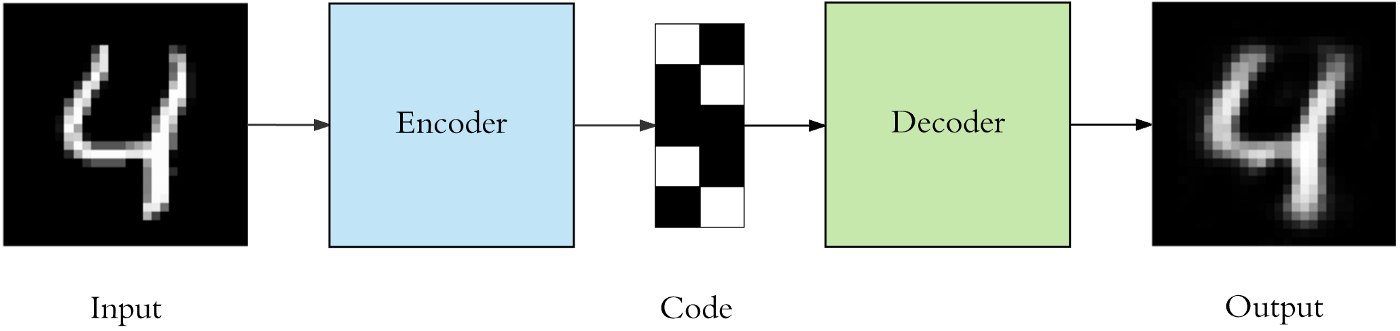

## Programming : 
  Please write a program to demonstrate the same

In [ ]:
## Write your code here
import keras 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from keras.datasets import mnist 
from keras.models import Model, Sequential 
from keras.layers import Input, add 
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape 
from keras import regularizers 
from keras.regularizers import l2 
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D 
from keras.utils import np_utils
                                                                                            

11501568/11490434 [==============================] - 0s 0us/step


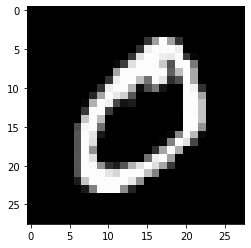

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) 

plt.imshow(X_train[1].reshape(28,28),cmap='gray')

In [ ]:
X_train = X_train.astype("float32")/255. 
X_test = X_test.astype("float32")/255. 
print('X_train shape:', X_train.shape) 
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:]))) 
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_train.shape[1:]


(784,)

# **Simple Autoencoder Model**

In [ ]:
input_size = 784
hidden_size2 = 64 
hidden_size1 = 256 
output_size = 784


In [ ]:
x = Input(shape=(input_size,))
h1 = Dense(hidden_size1, activation='relu')(x)
h2 = Dense(hidden_size2, activation='relu')(h1)
# d=  Dropout(rate=0.2)
h3 = Dense(hidden_size1, activation='relu')(h2)
r = Dense(output_size, activation='sigmoid')(h3)

autoencoder = Model(inputs=x, outputs=r)
# autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.compile(loss="mse",optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
#second model
# x = Input(shape=(input_size,))
# h1 = Dense(128, activation='relu')(x)
# h2 = Dense(64, activation='relu')(h1)
# # d=  Dropout(rate=0.2)
# h3 = Dense(32, activation='relu')(h2)
# h4 = Dense(64, activation = 'relu')(h3)
# h5 = Dense(128, activation = 'relu')(h4)
# r = Dense(output_size, activation='sigmoid')(h5)

# autoencoder = Model(inputs=x, outputs=r)
# # autoencoder.compile(optimizer='adam', loss='mse')
# autoencoder.compile(loss="mse",optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 256)               16640     
                                                                 
 dense_3 (Dense)             (None, 784)               201488    
                                                                 
Total params: 435,536
Trainable params: 435,536
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [ ]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 11s 20ms/step - loss: 0.0324 - accuracy: 0.0094 - val_loss: 0.0185 - val_accuracy: 0.0101
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0164 - accuracy: 0.0107 - val_loss: 0.0153 - val_accuracy: 0.0112
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0127 - accuracy: 0.0118 - val_loss: 0.0108 - val_accuracy: 0.0151
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0108 - accuracy: 0.0131 - val_loss: 0.0099 - val_accuracy: 0.0138
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0097 - accuracy: 0.0131 - val_loss: 0.0093 - val_accuracy: 0.0121


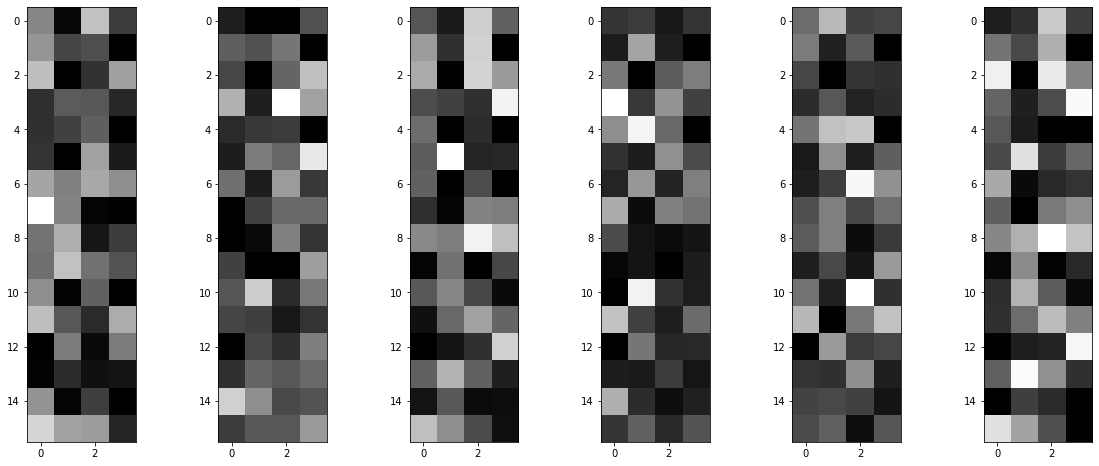

In [ ]:
conv_encoder = Model(x, h2)
encoded_imgs = conv_encoder.predict(X_test)

n = 6
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)
plt.show()

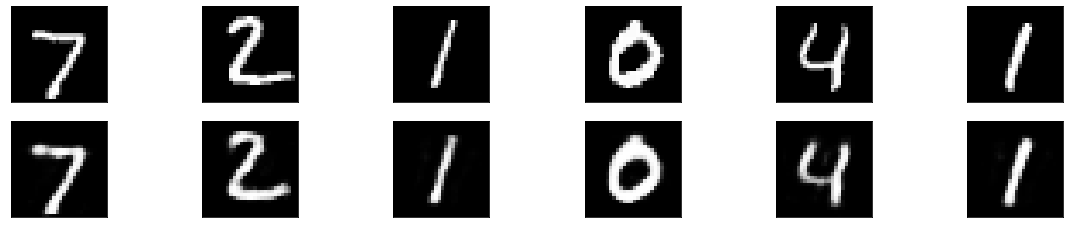

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


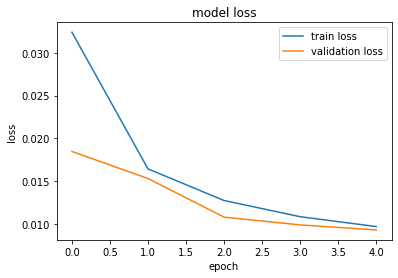

In [ ]:
#Prediction
decoded_imgs = autoencoder.predict(X_test)
n = 6
# print("Original images\n")
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#Loss
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

In [ ]:
#With Noisy input
noise = np.random.normal(0,0.1,784) # gaussian noise
X_test_noisy=[]
for i in range(X_test.shape[0]):
  X_test_noisy.append(X_test[i]+noise)
X_test_noisy= np.array(X_test_noisy)
X_test_noisy.shape

(10000, 784)

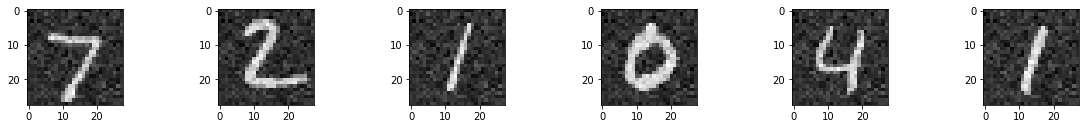

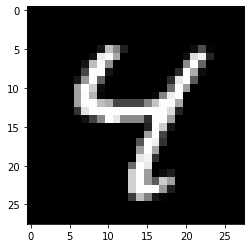

In [ ]:
# Noisy Images

n=6
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
plt.figure(figsize=(5, 4))
plt.imshow(X_test[6].reshape(28,28))

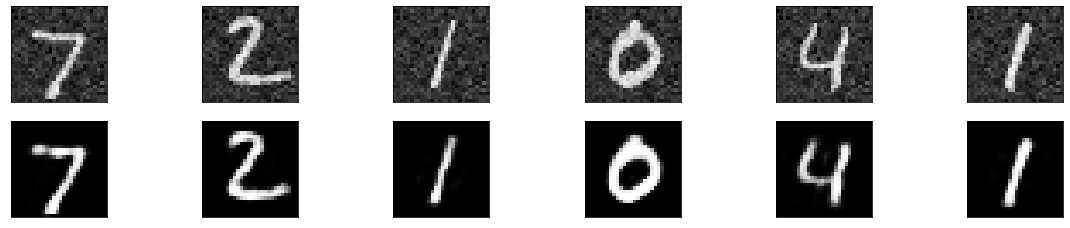

In [ ]:
#Prediction
decoded_imgs_noisy = autoencoder.predict(X_test_noisy)
n = 6
# print("Original images\n")
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

**Model with Dropout**

In [ ]:
x = Input(shape=(input_size,))
h1 = Dense(hidden_size1, activation='relu')(x)
h2 = Dense(hidden_size2, activation='relu')(h1)
d=  Dropout(rate=0.2)
h3 = Dense(hidden_size1, activation='relu')(h2)
r = Dense(output_size, activation='sigmoid')(h3)

autoencoder = Model(inputs=x, outputs=r)
# autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.compile(loss="mse",optimizer='adam',metrics=['accuracy'])

In [ ]:
# without noise
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0342 - accuracy: 0.0114 - val_loss: 0.0140 - val_accuracy: 0.0109
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0117 - accuracy: 0.0110 - val_loss: 0.0092 - val_accuracy: 0.0118
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0086 - accuracy: 0.0125 - val_loss: 0.0075 - val_accuracy: 0.0146
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0073 - accuracy: 0.0131 - val_loss: 0.0067 - val_accuracy: 0.0134
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0064 - accuracy: 0.0133 - val_loss: 0.0059 - val_accuracy: 0.0119


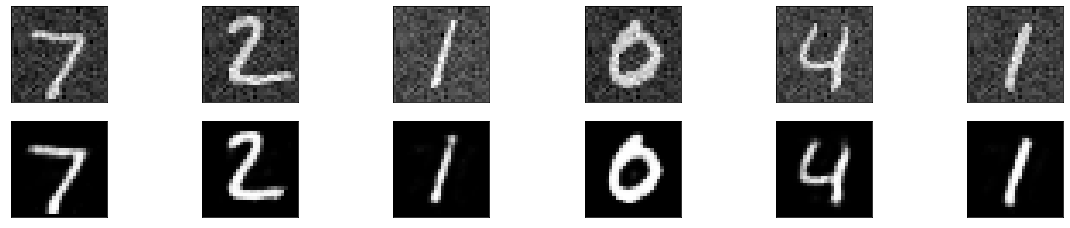

In [ ]:
# Testing with noisy images

decoded_imgs2 = autoencoder.predict(X_test_noisy)
n = 6
# print("Original images\n")
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    # plt.imshow(X_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# **Convolutional Autoencoder**

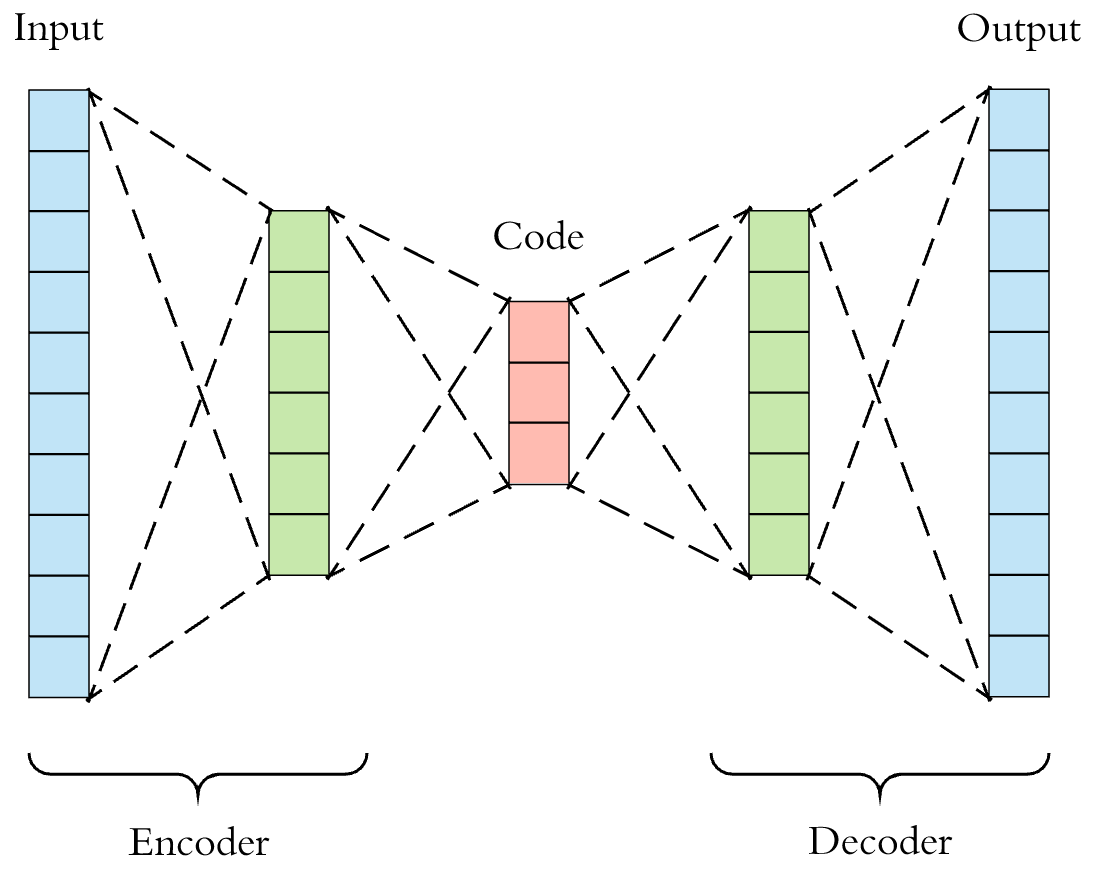

In [ ]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
x = Input(shape=(28, 28,1)) 

# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)

autoencoder = Model(inputs=x, outputs=r)
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.compile(loss="mse",optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

In [ ]:
#training
epochs = 2
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test))

Epoch 1/2
469/469 [==============================] - 16s 16ms/step - loss: 0.0528 - accuracy: 0.7903 - val_loss: 0.0376 - val_accuracy: 0.7895
Epoch 2/2
469/469 [==============================] - 6s 13ms/step - loss: 0.0330 - accuracy: 0.7990 - val_loss: 0.0283 - val_accuracy: 0.8046


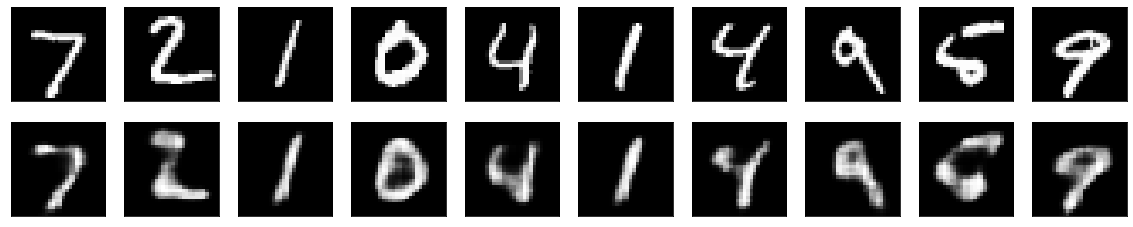

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


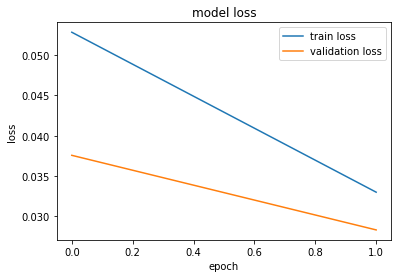

In [ ]:
decoded_imgs = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

# **Denoising Autoencoder**

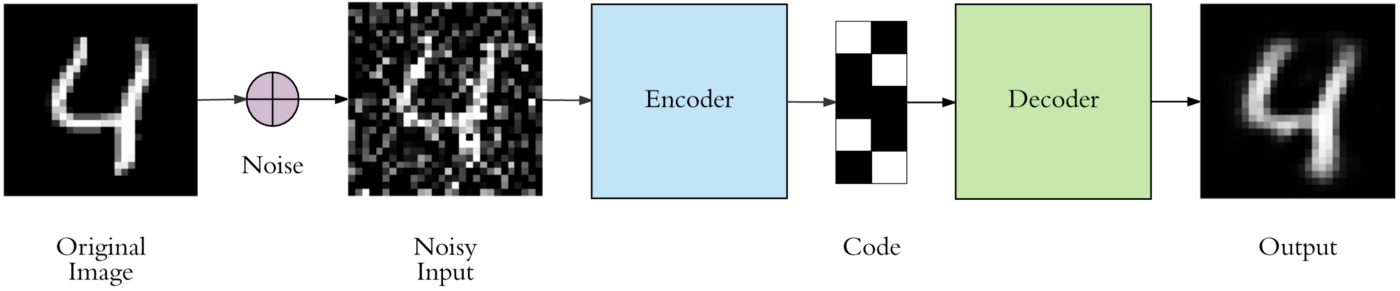


There is another way to force the autoencoder to learn useful features, which is adding random noise to its inputs and making it recover the original noise-free data.We are asking it to subtract the noise and produce the underlying meaningful data. This is called a denoising autoencoder.


In [ ]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
X_test_noisy.shape

(10000, 28, 28, 1)

In [ ]:
np.prod(X_train.shape[1:])

784

In [ ]:
# # encoderNoiseRemover = Sequential()

# x = Input(shape=(28, 28, 1))

# conv3_1 = (Conv2D(filters=16, kernel_size=(4,4),input_shape=(28, 28,1),padding="same", activation='relu',))(x)
# pool1 = (MaxPooling2D(pool_size=(2, 2)))(conv3_1)

# conv3_2 = (Conv2D(filters=32, kernel_size=(4,4),padding="same", activation='relu',))(pool1)


# conv3_3 = (Conv2D(filters=16, kernel_size=(4,4),input_shape=(14, 14,32),padding="same", activation='relu',)) (conv3_2)

# up1 = (UpSampling2D(size=(2,2)))(conv3_3)
# r = (Conv2D(filters=1, kernel_size=(4,4),padding="same", activation='sigmoid',))(up1)



# autoencoder = Model(inputs=x, outputs=r)
# # autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
# autoencoder.compile(optimizer='Adam', loss='mse',metrics=['accuracy'])

In [ ]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_test_noisy = X_test_noisy.reshape((len(X_test_noisy), np.prod(X_test_noisy.shape[1:])))
X_train_noisy = X_train_noisy.reshape((len(X_train_noisy), np.prod(X_train_noisy.shape[1:])))
X_test_noisy.shape

(10000, 784)

In [ ]:
x = Input(shape=(input_size,))
h1 = Dense(hidden_size1, activation='relu')(x)
h2 = Dense(hidden_size2, activation='relu')(h1)
# d=  Dropout(rate=0.2)
h3 = Dense(hidden_size1, activation='relu')(h2)
r = Dense(output_size, activation='sigmoid')(h3)

autoencoder = Model(inputs=x, outputs=r)
# autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.compile(loss="mse",optimizer='rmsprop')

In [ ]:
autoencoder.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 64)                16448     
                                                                 
 dense_14 (Dense)            (None, 256)               16640     
                                                                 
 dense_15 (Dense)            (None, 784)               201488    
                                                                 
Total params: 435,536
Trainable params: 435,536
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 3
batch_size = 128

history = autoencoder.fit(X_train_noisy, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_noisy, X_test))

Epoch 1/3
469/469 [==============================] - 4s 6ms/step - loss: 0.0439 - val_loss: 0.0330
Epoch 2/3
469/469 [==============================] - 3s 6ms/step - loss: 0.0280 - val_loss: 0.0254
Epoch 3/3
469/469 [==============================] - 3s 6ms/step - loss: 0.0234 - val_loss: 0.0217


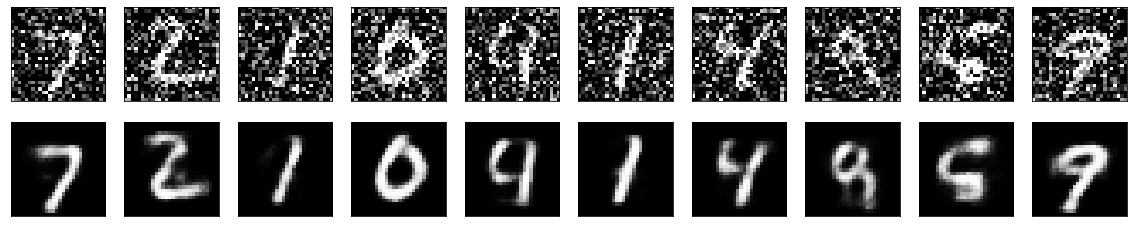

dict_keys(['loss', 'val_loss'])


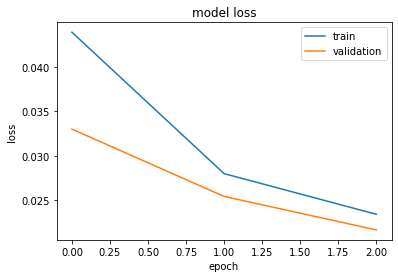

In [ ]:
decoded_imgs = autoencoder.predict(X_test_noisy)
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Inferences and Conclusion : State all the key observations and conclusion

### Conclusion

1- Autoencoder trained on clean input was able to copy only cleaned input to same output.

2- Autoencoder trained on noisy data was able to denoise the unseen data.

3- On increasing dropout performance was decreasing.

4- Sigmoid is preferred because we are using data after normalising.The sigmoid might help making the learning process more stable.

#Problem 2 : Demonstrate the importance of different regularization techniques to train an Autoencoder. (pytorch/keras/tensorflow)

Observation to be demonstrated
1. Use suitable data and auto-encoder architecture to demonstrate the same. (MNIST
fashion/digit data can be used)
1. Implement weight decaying, sparse and contractive regularization functions and train the autoencoder using the same and show the significance of using
them in autoencoder training

##Write down the Objectives, Hypothesis and Experimental description for the above problem


**Objective:** To implement the autoencoder with various regularization techniques and see the output.

**Hypothesis:** Regularization must improve the performance of the autoencoder.

**Experimental Procedure:**

1.  Downloading the dataset and preprocessing.
2.  Implementing simple autoencoder.
3.  Implementing Sparse autoencoder.
4.  Implementing Weight decaying autoencoder.
5.  Implementing Contracting autoencoder model.
6.  Anlayzing the output for all.

# **Regularization in autoenconders**

Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well.In deep learning, it actually penalizes the weight matrices of the nodes.

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout

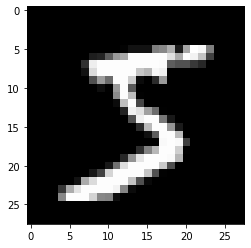

In [ ]:
from tensorflow.keras.datasets import mnist
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
plt.imshow(xTrain[0])

In [ ]:
xTrain = xTrain/255
xTest = xTest/255
xTrain = xTrain.reshape(60000, 28, 28, 1)
xTest = xTest.reshape(10000,28,28,1)
xVal = xTest[0:5000,:,:,:]
xTest = xTest[5000:10000,:,:,:]

**Simple Autoencoder**

In [ ]:
### Defining the encoder architecture

encoder = Sequential()
encoder.add(Conv2D(filters=16, kernel_size=(4,4),input_shape=(28, 28,1),padding="same", activation='relu',))
encoder.add(MaxPool2D(pool_size=(2, 2)))

encoder.add(Conv2D(filters=32, kernel_size=(4,4),padding="same", activation='relu',))
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 28, 28, 16)        272       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
Total params: 8,496
Trainable params: 8,496
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### Defining the decoder architecture
decoder = Sequential()
decoder.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(14, 14,32),padding="same", activation='relu',))
decoder.add(UpSampling2D(size=(2,2)))
decoder.add(Conv2D(filters=1, kernel_size=(4,4),padding="same", activation='sigmoid',))
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 14, 14, 32)        16416     
                                                                 
 up_sampling2d_10 (UpSamplin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 1)         513       
                                                                 
Total params: 16,929
Trainable params: 16,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### Combining the encoder and decoder to form autoencoder
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="mse",optimizer='adam')
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 14, 14, 32)        8496      
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 1)         16929     
                                                                 
Total params: 25,425
Trainable params: 25,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### Training the autoencoder
History_simple_autoencoder = autoencoder.fit(xTrain, xTrain, batch_size = 100, epochs=30,validation_data=(xVal, xVal))

Epoch 1/30
600/600 [==============================] - 8s 12ms/step - loss: 0.0115 - val_loss: 0.0017
Epoch 2/30
600/600 [==============================] - 7s 12ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/30
600/600 [==============================] - 7s 12ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/30
600/600 [==============================] - 7s 12ms/step - loss: 9.6482e-04 - val_loss: 8.9573e-04
Epoch 5/30
600/600 [==============================] - 7s 12ms/step - loss: 8.6554e-04 - val_loss: 8.0928e-04
Epoch 6/30
600/600 [==============================] - 8s 13ms/step - loss: 7.9803e-04 - val_loss: 7.4926e-04
Epoch 7/30
600/600 [==============================] - 7s 12ms/step - loss: 7.3595e-04 - val_loss: 7.0286e-04
Epoch 8/30
600/600 [==============================] - 7s 12ms/step - loss: 6.8779e-04 - val_loss: 6.5021e-04
Epoch 9/30
600/600 [==============================] - 7s 12ms/step - loss: 6.4225e-04 - val_loss: 6.0934e-04
Epoch 10/30
600/600 [======================

<Figure size 432x288 with 0 Axes>

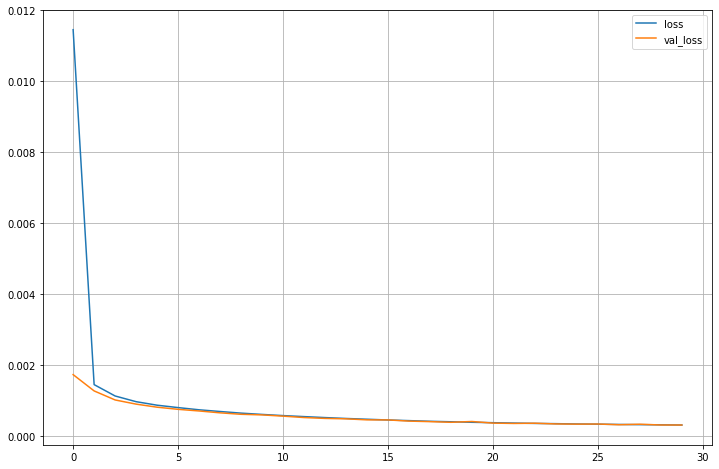

In [ ]:
import pandas as pd
plt.figure()
pd.DataFrame(History_simple_autoencoder.history).plot(figsize=(12,8))
plt.grid(True)
plt.show()

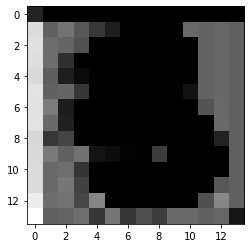

In [ ]:
#compressed image
compressedImage = encoder.predict(xTest[:10])
plt.imshow(compressedImage[0][:,:,0])

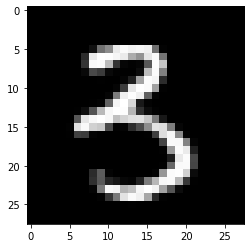

In [ ]:
### Predicting on Test images

autoencoderOutputCleanImages = autoencoder.predict(xTest[:10])
### Output of autoencoder

plt.imshow(autoencoderOutputCleanImages[0][:,:,0])

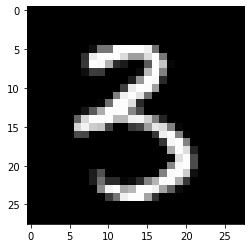

In [ ]:
plt.imshow(xTest[0][:,:,0])

In [ ]:
x_train = xTrain.reshape(xTrain.shape[0],784)
x_val = xVal.reshape(xVal.shape[0],784)

# **Weight Decay Autoencoder**

L2 regularization is also known as weight decay as it forces the weights to decay towards zero (but not exactly zero).Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models. Therefore, it will also reduce overfitting to quite an extent.

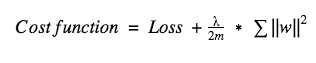

Here, lambda is the regularization parameter. It is the hyperparameter whose value is optimized for better results.

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
kernel_regularizer = tf.keras.regularizers.l2(l2=1e-3)

In [ ]:
### Defining the encoder architecture

weightDecayEncoder = Sequential()
weightDecayEncoder.add(Conv2D(filters=16, kernel_size=(4,4),input_shape=(28, 28,1),padding="same", activation='relu',kernel_regularizer=kernel_regularizer))
weightDecayEncoder.add(MaxPool2D(pool_size=(2, 2)))

weightDecayEncoder.add(Conv2D(filters=32, kernel_size=(4,4),padding="same", activation='relu',kernel_regularizer=kernel_regularizer))


In [ ]:
### Defining the decoder architecture


weightDecayDecoder = Sequential()
weightDecayDecoder.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(14, 14,32),padding="same", activation='relu',kernel_regularizer=kernel_regularizer))
weightDecayDecoder.add(UpSampling2D(size=(2,2)))
weightDecayDecoder.add(Conv2D(filters=1, kernel_size=(4,4),padding="same", activation='sigmoid',kernel_regularizer=kernel_regularizer))


In [ ]:
### Combining the encoder and decoder to form autoencoder
weightDecayAutoencoder = Sequential([weightDecayEncoder, weightDecayDecoder])
weightDecayAutoencoder.compile(loss="mse",optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss',patience=3)
### Training the autoencoder
decayHistory = weightDecayAutoencoder.fit(xTrain, xTrain, batch_size = 100, epochs=30,validation_data=(xVal, xVal))

Epoch 1/30
600/600 [==============================] - 8s 13ms/step - loss: 0.0269 - val_loss: 0.0117
Epoch 2/30
600/600 [==============================] - 7s 12ms/step - loss: 0.0109 - val_loss: 0.0106
Epoch 3/30
600/600 [==============================] - 7s 12ms/step - loss: 0.0104 - val_loss: 0.0105
Epoch 4/30
600/600 [==============================] - 7s 12ms/step - loss: 0.0103 - val_loss: 0.0102
Epoch 5/30
600/600 [==============================] - 7s 12ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 6/30
600/600 [==============================] - 7s 12ms/step - loss: 0.0101 - val_loss: 0.0102
Epoch 7/30
600/600 [==============================] - 7s 12ms/step - loss: 0.0101 - val_loss: 0.0102
Epoch 8/30
600/600 [==============================] - 7s 12ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 9/30
600/600 [==============================] - 7s 12ms/step - loss: 0.0100 - val_loss: 0.0101
Epoch 10/30
600/600 [==============================] - 7s 12ms/step - loss: 0.0100 - val_lo

<Figure size 432x288 with 0 Axes>

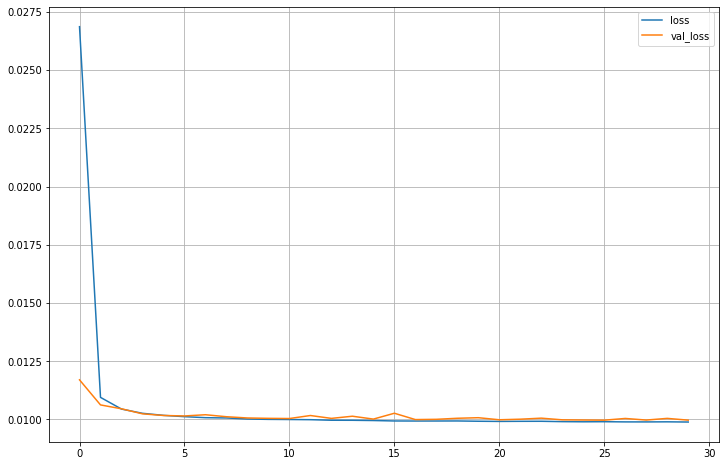

In [ ]:
import pandas as pd
plt.figure()
pd.DataFrame(decayHistory.history).plot(figsize=(12,8))
plt.grid(True)
plt.show()

**Dense Layers**

In [ ]:
AutoDenseDecay  = Sequential()
AutoDenseDecay.add(Dense(1400 , activation="relu",input_shape = (784,),kernel_regularizer=kernel_regularizer))
AutoDenseDecay.add(Dense(2800 , activation="relu",input_shape = (784,),kernel_regularizer=kernel_regularizer))
AutoDenseDecay.add(Dense(1400 , activation="relu",input_shape = (784,),kernel_regularizer=kernel_regularizer))
AutoDenseDecay.add(Dense(784 , activation="sigmoid"))
AutoDenseDecay.compile(loss="binary_crossentropy",optimizer='adam')

In [ ]:
denseDecayHistory = AutoDenseDecay.fit(x_train,x_train, batch_size = 100, epochs=50,validation_data=(x_val,x_val))

Epoch 1/50
600/600 [==============================] - 118s 196ms/step - loss: 0.3245 - val_loss: 0.1944
Epoch 2/50
600/600 [==============================] - 110s 183ms/step - loss: 0.1901 - val_loss: 0.1848
Epoch 3/50
600/600 [==============================] - 110s 184ms/step - loss: 0.1825 - val_loss: 0.1780
Epoch 4/50
600/600 [==============================] - 112s 187ms/step - loss: 0.1763 - val_loss: 0.1719
Epoch 5/50
600/600 [==============================] - 111s 185ms/step - loss: 0.1712 - val_loss: 0.1691
Epoch 6/50
600/600 [==============================] - 111s 184ms/step - loss: 0.1686 - val_loss: 0.1662
Epoch 7/50
600/600 [==============================] - 109s 182ms/step - loss: 0.1661 - val_loss: 0.1637
Epoch 8/50
600/600 [==============================] - 119s 198ms/step - loss: 0.1629 - val_loss: 0.1610
Epoch 9/50
600/600 [==============================] - 110s 184ms/step - loss: 0.1608 - val_loss: 0.1589
Epoch 10/50
600/600 [==============================] - 110s 183m

<Figure size 432x288 with 0 Axes>

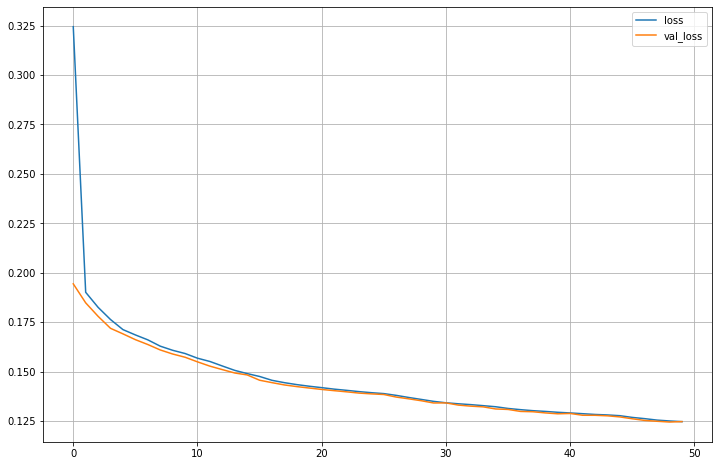

In [ ]:
import pandas as pd
plt.figure()
pd.DataFrame(denseDecayHistory.history).plot(figsize=(12,8))
plt.grid(True)
plt.show()

# **Sparse Autoencoder**

We can regularize the autoencoder by using a sparsity constraint such that only a fraction of the nodes would have nonzero values, called active nodes.In particular, we add a penalty term to the loss function such that only a fraction of the nodes become active. This forces the autoencoder to represent each input as a combination of small number of nodes, and demands it to discover interesting structure in the data.

In [ ]:
K = keras.backend
kl_divergence = tf.keras.losses.kullback_leibler_divergence

In [ ]:
def sparseRegularizer(inputs):
  lambdaRegularization = 1
  sparsityConstant = 0.05
  meanActivation = K.mean(inputs, axis=0)
  return K.sum(lambdaRegularization*(kl_divergence(sparsityConstant, meanActivation) +kl_divergence(1- sparsityConstant, 1-meanActivation)))

In [ ]:
### Defining the encoder architecture

sparseEncoder = Sequential()
sparseEncoder.add(Conv2D(filters=16, kernel_size=(4,4),input_shape=(28, 28,1),padding="same", activation='sigmoid',activity_regularizer=sparseRegularizer))
sparseEncoder.add(MaxPool2D(pool_size=(2, 2)))

sparseEncoder.add(Conv2D(filters=32, kernel_size=(4,4),padding="same", activation='sigmoid',activity_regularizer=sparseRegularizer))


In [ ]:
### Defining the decoder architecture


sparseDecoder = Sequential()
sparseDecoder.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(14, 14,32),padding="same", activation='sigmoid',activity_regularizer=sparseRegularizer))
sparseDecoder.add(UpSampling2D(size=(2,2)))
sparseDecoder.add(Conv2D(filters=1, kernel_size=(4,4),padding="same", activation='sigmoid'))


In [ ]:
### Combining the encoder and decoder to form autoencoder
sparseAutoencoder = Sequential([sparseEncoder, sparseDecoder])
sparseAutoencoder.compile(loss="mse",optimizer='adam')

In [ ]:
### Training the autoencoder
sparseHistory = sparseAutoencoder.fit(xTrain, xTrain, batch_size = 100, epochs=30,validation_data=(xVal, xVal))

Epoch 1/30
600/600 [==============================] - 11s 15ms/step - loss: 41.3199 - val_loss: 27.1464
Epoch 2/30
600/600 [==============================] - 9s 14ms/step - loss: 20.4125 - val_loss: 15.5358
Epoch 3/30
600/600 [==============================] - 9s 14ms/step - loss: 11.8631 - val_loss: 9.0900
Epoch 4/30
600/600 [==============================] - 9s 14ms/step - loss: 6.9739 - val_loss: 5.3354
Epoch 5/30
600/600 [==============================] - 9s 14ms/step - loss: 4.1253 - val_loss: 3.1609
Epoch 6/30
600/600 [==============================] - 9s 14ms/step - loss: 2.4858 - val_loss: 1.9120
Epoch 7/30
600/600 [==============================] - 9s 14ms/step - loss: 1.5230 - val_loss: 1.1464
Epoch 8/30
600/600 [==============================] - 9s 14ms/step - loss: 0.8645 - val_loss: 0.5847
Epoch 9/30
600/600 [==============================] - 9s 14ms/step - loss: 0.4096 - val_loss: 0.2732
Epoch 10/30
600/600 [==============================] - 9s 14ms/step - loss: 0.2012 - 

<Figure size 432x288 with 0 Axes>

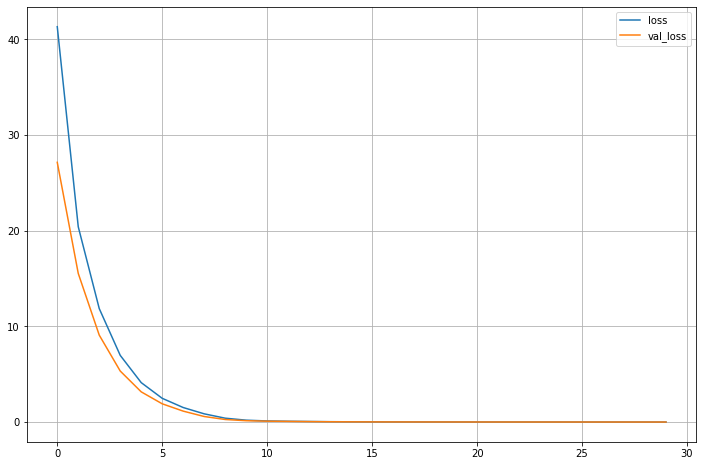

In [ ]:
plt.figure()
pd.DataFrame(sparseHistory.history).plot(figsize=(12,8))
plt.grid(True)
plt.show()

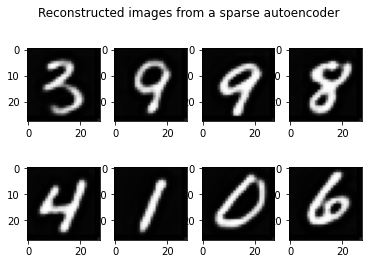

In [ ]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("Reconstructed images from a sparse autoencoder")

for i in range(8):
    sparseAutoencoderOutput = sparseAutoencoder.predict(np.expand_dims(xTest[i, :, :, :], axis=0))
    axarr[i//4, i%4].imshow(sparseAutoencoderOutput[0, :, :, 0],cmap = "gray")
    axarr[i//4, i%4].grid(False)

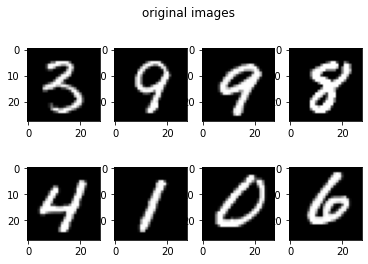

In [ ]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("original images")

for i in range(8):
   
    axarr[i//4, i%4].imshow(xTest[i, :, :, 0],cmap = "gray")
    axarr[i//4, i%4].grid(False)

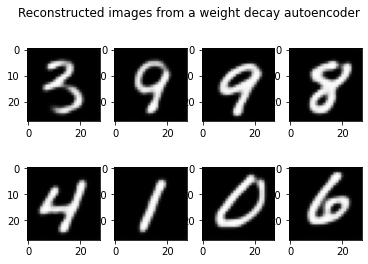

In [ ]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("Reconstructed images from a weight decay autoencoder")

for i in range(8):
    weightDecayAutoencoderOutput = weightDecayAutoencoder.predict(np.expand_dims(xTest[i, :, :, :], axis=0))
    axarr[i//4, i%4].imshow(weightDecayAutoencoderOutput[0, :, :, 0],cmap = "gray")
    axarr[i//4, i%4].grid(False)

# **Contractive Encoder**

Contractive autoencoder simply targets to learn invariant representations to unimportant transformations for the given data.The idea behind that is to make the autoencoders robust of small changes in the training dataset.Contractive autoencoder adds an extra term in the loss function of autoencoder, it is given as:

image.png

i.e the above penalty term is the Frobinious Norm of the encoder, the frobinious norm is just a generalization of Euclidean norm. The jacobian of the hidden layer is calculated as the first step.

In [ ]:
contractiveEncoder = Sequential()
### Defining the encoder architecture

contractiveEncoder.add(Conv2D(filters=16,kernel_size=(4,4),input_shape=(28, 28,1),padding="same", activation='relu'))
contractiveEncoder.add(MaxPool2D(pool_size=(2, 2)))

contractiveEncoder.add(Conv2D(filters=32,kernel_size=(4,4),padding="same", activation='relu',))


print(contractiveEncoder.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 28, 28, 16)        272       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
Total params: 8,496
Trainable params: 8,496
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
### Defining the decoder architecture


contractiveDecoder = Sequential()
contractiveDecoder.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(14, 14,32),padding="same", activation='relu',))
contractiveDecoder.add(UpSampling2D(size=(2,2)))
contractiveDecoder.add(Conv2D(filters=1,kernel_size=(4,4),padding="same", activation='sigmoid',))


In [ ]:
### Combining the encoder and decoder to form autoencoder
contractiveAutoencoder = Sequential([contractiveEncoder, contractiveDecoder])
contractiveAutoencoder.compile(loss="binary_crossentropy",optimizer='adam')

In [ ]:
tf.get_logger().setLevel('ERROR')

In [ ]:
# Prepare a dataset.
dataset = tf.data.Dataset.from_tensor_slices(
              (xTrain[0:4000].astype("float32"), xTrain[0:4000].astype("float32"))
)
dataset = dataset.shuffle(buffer_size=1024).batch(16)

# Instantiate a logistic loss function that expects integer targets.
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Iterate over the batches of the dataset.
for epoch in range(30):
    for step, (x, y) in enumerate(dataset):

        # Open a GradientTape.
        with tf.GradientTape(persistent=True) as tape:
            with tf.GradientTape(persistent=True) as tape1:
                # Forward pass.
                logits = contractiveAutoencoder(x)
                hidden_representation = contractiveEncoder(x)
                
            jacobian = tape1.batch_jacobian(hidden_representation, x)
            jacobian = tf.reshape(jacobian, (16, -1))
            norm = tf.norm(jacobian, ord='euclidean', axis=-1)
            regularization_term = tf.reduce_mean(norm)

            # Loss value for this batch.
            loss = loss_fn(y, logits)

            loss = loss + regularization_term

        # Get gradients of weights wrt the loss.
        gradients = tape.gradient(loss, contractiveAutoencoder.trainable_weights)
              
        # regularization_gradient = tape1.gradient(regularization_term, contractive_auto_encoder.trainable_weights)

        # print(regularization_gradient)
        # print(contractive_encoder(x).shape, jacobian.shape, norm.shape, regularization_term.shape)

        # Update the weights of our linear layer.
        optimizer.apply_gradients(zip(gradients, contractiveAutoencoder.trainable_weights))

    # Logging.
    print("Epoch:", epoch+1, "Loss:", float(loss))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch: 1 Loss: 0.06506949663162231
Epoch: 2 Loss: 0.07398007810115814
Epoch: 3 Loss: 0.06298905611038208
Epoch: 4 Loss: 0.06318684667348862
Epoch: 5 Loss: 0.0632423534989357
Epoch: 6 Loss: 0.06917530298233032
Epoch: 7 Loss: 0.06718917191028595
Epoch: 8 Loss: 0.07438551634550095
Epoch: 9 Loss: 0.0627475157380104
Epoch: 10 Loss: 0.06363486498594284
Epoch: 11 Loss: 0.06648141145706177
Epoch: 12 Loss: 0.05706643685698509
Epoch: 13 Loss: 0.06199658662080765
Epoch: 14 Loss: 0.060515958815813065
Epoch: 15 Loss: 0.05987801030278206
Epoch: 16 Loss: 0.06523006409406662
Epoch: 17 Loss: 0.0553579181432724
Epoch: 18 Loss: 0.058378785848617554
Epoch: 19 Loss: 0.059938449412584305
Epoch: 20 Loss: 0.06337287276983261
Epoch: 21 Loss: 0.05948996916413307
Epoch: 22 Loss: 0.06336574256420135
Epoch: 23 Loss: 0.06233063340187073
Epoch: 24 Loss: 0.06470833718776703
Epoch: 25 Loss: 0.06392218172550201
Epoch: 26 Loss: 0.06437784433364868
Epoch: 27 Loss: 0.06123102456331253
Epoch: 28 Loss: 0.05903439596295357
E

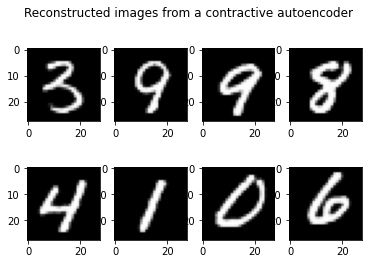

In [ ]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("Reconstructed images from a contractive autoencoder")

for i in range(8):
    contractiveAutoencoderOutput = contractiveAutoencoder.predict(np.expand_dims(xTest[i, :, :, :], axis=0))
    axarr[i//4, i%4].imshow(contractiveAutoencoderOutput[0, :, :, 0],cmap = "gray")
    axarr[i//4, i%4].grid(False)

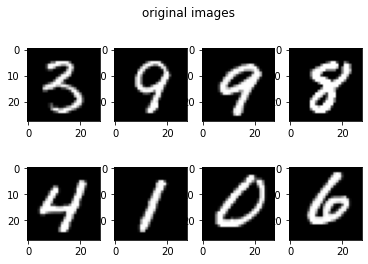

In [ ]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("original images")

for i in range(8):
   
    axarr[i//4, i%4].imshow(xTest[i, :, :, 0],cmap = "gray")
    axarr[i//4, i%4].grid(False)

## Inferences and Conclusion : State all the key observations and conclusion

1) Regularisation by l2 norm, sparse and contractive was shown

2) Since the current under complete CNN does not have many parameters, the effect of overfitting was not evident

3) Overcomplete autoencoder with dense layers was showing overfitting which was solved by regularisation